# Chapter 1
## Principal Component Analysis

Here we will use SVD to compute PCA (the bedrock dimensionality reduction technique in Machine Learning). This is a statistical perspective on PCA. PCA gives us a hierarchical coordinate system, based on data, to represent the statistcal variation in your datast (the directions that capture the maximu amount of variability.)

In this case we represent the data matrix $\mathbf{X}$ as:

$$
\mathbf{X} = \left[
    \begin{matrix}
- & X_1 & -\\
- & X_2 & -\\
- & \vdots & -\\
    \end{matrix}
    \right]
$$

where $X_i$ are _row_ vectors representing single experiments.

## Steps for SVD
1. Compute the "average row" and create a matrix $\bar{X}$ by "repeating" this row
$$
\bar{x} = \frac{1}{n}\sum_{j=1}^{n} x_j\\
\bar{X} = \left[ 
    \begin{matrix}
    1\\
    1\\
    \vdots\\
    1
\end{matrix}
\right] \left[
    \begin{matrix} 
    -&-&-&-&\bar{x}&-&-&-&-\\
    \end{matrix}
    \right]
$$
2. Subtract the mean matrix from the original matrix and call it $B$ (mean centred matrix, this is zero mean gaussian)
$$
B = X - \bar{X}
$$
3. Compute the _feature-wise_ covariance matrix of the rows of $B$:

$$
C = B^T B
$$

4. Compute the eigenvectors of $C$ which are the singular vectors of $X$
$$
V^T B^T B V = V^T C V
$$
Then we get:
$$
C V = V D
$$
where D is the eigenvalues matrix

5. Nnow, the principal components are:

$$
T = BV
$$
where $V$ are the loadings of each of the principal components each of the experiments has.

Now, remember that:

$$
B = U\Sigma V^T
$$

Then $T=U\Sigma V^T\;V = U \Sigma$. Then $B = TV^T$. This means that you can get the principal component $T$ and the loadings $V$ from the SVD of a matrix. Obviously the eigenvalues in $D$ give us an idea about the amount of variance the corresponding eigenvetors capture. 

Let's see an example.

## PCA Example

Let's assume that we have carried out 1 measurement for 

In [42]:
using LinearAlgebra, Random, Plots

Let's assume we take 17 measurements of 1 point each. Let's assume there is a simple proportionality constant between the dependent ($b$) and the independent ($a$) variable such that:

$$
y = k \cdot x
$$

Let's assume $k = 3$. Let's initialise the arrays and create the dataset.

In [40]:
k = 3
x=Vector(LinRange(-2,2,17));
y = k * x + randn(length(a));

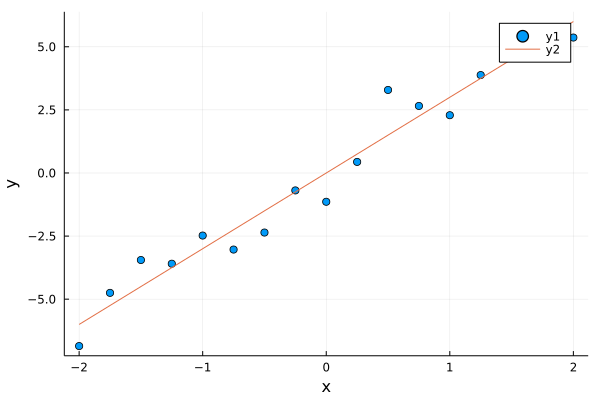

In [50]:
scatter(x,y)
plot!(x,3*x, xlabel="x", ylabel="y")

Let's assume we only have the measurements $x$ and perform SVD on this data.

In [90]:
U,S,V = svd(x, full=false);

Obviously, $\tilde{x} = A^{-1}b =(U \Sigma V^T)^{-1}\;b = V \Sigma^{-1} U^{T}\;b$ or, in our case, $\tilde{k} = x^{-1} b = V \Sigma^{-1} U^{T}\;y$ where $_x$ indicates the SVD of the $x$ array. Therefore: 

In [91]:
kappa_tilde = V * inv(Diagonal(S)) * transpose(U) * y

1-element Vector{Float64}:
 2.9543924478439703

Which means that our estimated relationship between $y$ and $x$ is such that

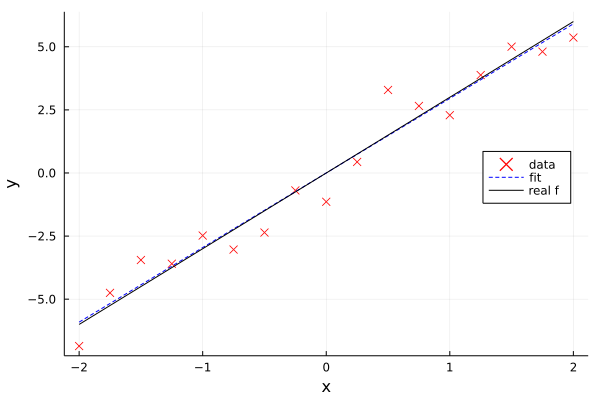

In [93]:
scatter(x,y, label="data", markershape=:x, seriescolor=:red)
plot!(x, kappa_tilde .* x, color=:blue, label="fit", linestyle=:dash)
plot!(x,3*x, xlabel="x", ylabel="y", legend=:right, label="real f", linecolor=:black)


## Example 2

In this problem we are trying to predict the amount of heat generated by (13) different mixtures of (4) different ingredients to make cement. Let's load the necessary packages.

In [95]:
using CSV, Plots, LinearAlgebra, DataFrames

Let's load the data.

In [122]:
A = Matrix(DataFrame(CSV.File("./data/hald_ingredients.csv"))); #these are the hald_ingredients
b = Matrix(DataFrame(CSV.File("./data/hald_heat.csv")));

Let's find the vector $x$ that tells us how each ingredient contributes to heat creation for each mixture. 

Let's first compute the SVD of A:

In [123]:
U,S,V = svd(A, full=false);

In [124]:
x_tilde = V * inv(Diagonal(S)) * transpose(U)*b;

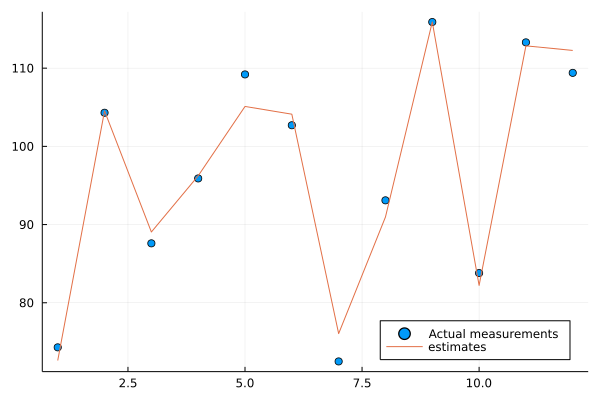

In [131]:
scatter(b, legend=:bottomright, label="Actual measurements")
plot!(A * x_tilde, label="estimates")

## Example 3

In this example we try to determine the factors that determine house prices in Boston. Let's load the data first

In [136]:
using DelimitedFiles

H=readdlm("./data/housing.data");
a = H[:, 1:end-1];
b = H[:, end];

Let's add a column (of 1's) to $a$ to allow for a non zero intercept in the regression

In [140]:
a=[a ones(size(a)[1])];

Let's thenn solve the linear system. Let's first calculate the SVD.

In [142]:
U,S,V = svd(a);

Let's then use the eigs to calculate the coefficients of the regression

In [144]:
x_tilde = V * inv(Diagonal(S)) * transpose(U) * b;

Let's quickly investigate the coefficients of the regression

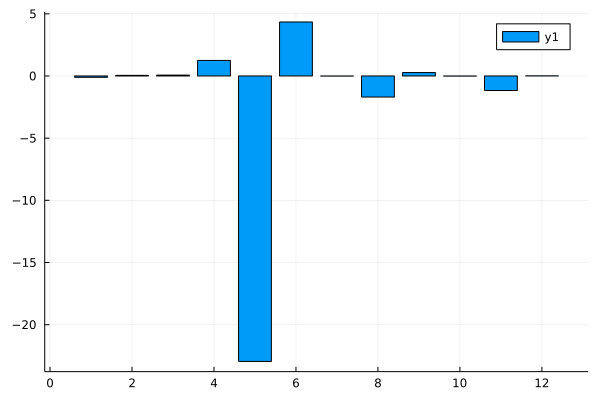

In [151]:
bar(x_tilde[1:end-3])

Then, let's use these coefficients to "predict" hous prices. Here we are plotting data/predictions in order of price (the highest price houses are difficult to predict).

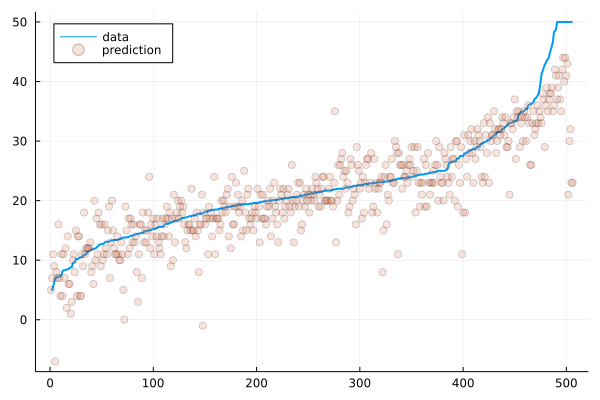

In [162]:
plot(b[sortperm(b)], label="data", linewidth=2)
scatter!(a[sortperm(b),:]*x_tilde, alpha=0.2, label="prediction", legend=:topleft)

What if we wanted to study the significance of each attribute. We could use the same approach used in PCA. Namely:
1. Renormalise the matrix to $\mu = 0$, $\sigma =1$
2. Compute the SVD
3. Plot the coefficients of the regression

In [183]:
using Statistics

# Step 1
a = H[:, 1:end-1];
A_mean = mean(a, dims=1) #row mean

# Calculate the mean matrix
A2 = a - ones(size(a)[1],1)*A_mean;

# Calculate

for i in 1:size(A2)[2]
    A2std=std(A2[:, i])
    A2[:, i]=A2[:, i]/A2std
end

A2[:, end]=ones(size(A2)[1])

# Step 2: compute the SVD

U,S,V = svd(A2, full=false)
x_tilde2= V * inv(Diagonal(S)) * transpose(U) * b;

And now, step 3, plot the coefficients.

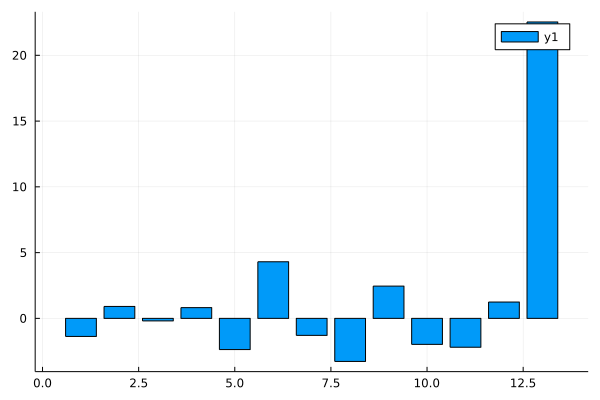

In [185]:
bar(x_tilde2)

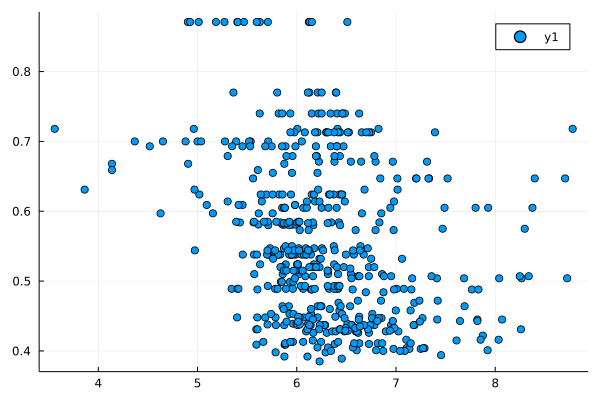

In [199]:
scatter(a[:, 6], a[:,5])

In [196]:
#Principal components
T = U*Diagonal(S)
# Loadings
V

13×13 adjoint(::Matrix{Float64}) with eltype Float64:
  0.263036     -0.335         0.222164    …   0.0972549     0.0491451
 -0.271579     -0.331163      0.355108       -0.0769828    -0.0796294
  0.364765      0.10537      -0.0436719      -0.103592     -0.249786
  0.0102653     0.437366      0.365982       -0.00564935    0.0351622
  0.361523      0.204851      0.125527        0.80562       0.0454007
 -0.179352      0.100186      0.556208    …   0.126806      0.034219
  0.326977      0.308911     -0.00550371     -0.166691     -0.0282598
 -0.342776     -0.335014     -0.026122        0.426698     -0.0162936
  0.341253     -0.302173      0.212252       -0.110959     -0.634017
  0.359262     -0.26469       0.154402       -0.208279      0.7216
  0.213827     -0.295817     -0.447552    …   0.204844      0.0241083
 -0.213023      0.259183     -0.30604         0.0351799    -0.0072314
 -3.04964e-17   3.29324e-15   7.2459e-15     -3.06898e-15   2.63662e-16